In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [76]:
dataset_path = '/Users/Haris/Desktop/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(dataset_path)
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


### Dataset Information

**Dataset Name:** Stroke Prediction Dataset  
**Collected By:** User named:fedesoriano 
**Source:** [Kaggle - Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)  
**Purpose:** This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient

**Year in which dataset is collected:** 2020


# Description of the dataset attributes

In [11]:
attributes_info = """
Attributes and their Descriptions:
1. id: Unique identifier
2. gender: "Male", "Female" or "Other"
3. age: Age of the patient (numeric)
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: Average glucose level in blood (numeric)
10. bmi: Body Mass Index (numeric)
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke: 1 if the patient had a stroke or 0 if not
"""

print(attributes_info)



Attributes and their Descriptions:
1. id: Unique identifier
2. gender: "Male", "Female" or "Other"
3. age: Age of the patient (numeric)
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: Average glucose level in blood (numeric)
10. bmi: Body Mass Index (numeric)
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke: 1 if the patient had a stroke or 0 if not



# Data types of Attributes

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [ ]:
##The dataset has 12 features and include numerical and categorical variables such as Age, avg_glucose_level, bimi, etc. 
##Numerical and categorical variables including Gender, work type, smoking status, etc. Depending on the nature of countable quantities,
##numerical attributes are of continuous and discrete type whereas categorical attributes are of binary and multi-class in nature.
##Encoding the categorical variables and dealing with the missing bmi values will be need for analysis.

# Independent Attributes

In [2]:
##An independent variable is a variable that is used to explain or predict the outcome of another variable, known as the dependent variable.

In [4]:
## These variables can be considered independent because they describe the properties of the patient.
## These independent variables include medical conditions and lifestyle factors that are used to predict the target variable "stroke".
## They do not rely on ‘stroke’ but rather determine the effect of the latter.


In [6]:
independent_variables = [
    "id",                 
    "gender",            
    "age",               
    "hypertension",       
    "heart_disease",      
    "ever_married",      
    "work_type",          
    "Residence_type",     
    "avg_glucose_level",  
    "bmi",                
    "smoking_status"      
]

print("Independent Variables :")
for var in independent_variables:
    print(f"- {var}: Independent because it provides input for predicting 'stroke' and does not depend on it.")

Independent Variables :
- id: Independent because it provides input for predicting 'stroke' and does not depend on it.
- gender: Independent because it provides input for predicting 'stroke' and does not depend on it.
- age: Independent because it provides input for predicting 'stroke' and does not depend on it.
- hypertension: Independent because it provides input for predicting 'stroke' and does not depend on it.
- heart_disease: Independent because it provides input for predicting 'stroke' and does not depend on it.
- ever_married: Independent because it provides input for predicting 'stroke' and does not depend on it.
- work_type: Independent because it provides input for predicting 'stroke' and does not depend on it.
- Residence_type: Independent because it provides input for predicting 'stroke' and does not depend on it.
- avg_glucose_level: Independent because it provides input for predicting 'stroke' and does not depend on it.
- bmi: Independent because it provides input for pr

## Reason why each variable is independent 

In [11]:
independent_variables_with_reasons = {
    "id": "A unique identifier for each patient, not dependent on stroke outcome.",
    "gender": "Represents the gender of the patient, which could influence health conditions but is not affected by stroke.",
    "age": "Age is a key factor influencing stroke risk but is not affected by stroke itself.",
    "hypertension": "Hypertension is a risk factor for stroke but it is not an effect of the stroke; therefore, this field incorporates information about the patient's hypertension status.",
    "heart_disease": "Indicates whether a patient has heart disease, influencing stroke risk but independent of stroke.",
    "ever_married": "Represents marital status, which may correlate with lifestyle but is not influenced by stroke.",
    "work_type": "Type of work reflects lifestyle and stress levels, factors influencing stroke but independent of it.",
    "Residence_type": "Living in rural or urban areas may impact healthcare access but does not depend on stroke.",
    "avg_glucose_level": "High glucose levels indicate potential diabetes, a risk factor for stroke but not caused by it.",
    "bmi": "Body mass index reflects obesity, influencing stroke risk but independent of stroke.",
    "smoking_status": "Smoking habits influence stroke risk but are not influenced by stroke itself."
}

print("Independent Variables and Why They Are Independent:\n")
for var, reason in independent_variables_with_reasons.items():
    print(f"- {var}: {reason}")


Independent Variables and Why They Are Independent:

- id: A unique identifier for each patient, not dependent on stroke outcome.
- gender: Represents the gender of the patient, which could influence health conditions but is not affected by stroke.
- age: Age is a key factor influencing stroke risk but is not affected by stroke itself.
- hypertension: Hypertension is a risk factor for stroke but it is not an effect of the stroke; therefore, this field incorporates information about the patient's hypertension status.
- heart_disease: Indicates whether a patient has heart disease, influencing stroke risk but independent of stroke.
- ever_married: Represents marital status, which may correlate with lifestyle but is not influenced by stroke.
- work_type: Type of work reflects lifestyle and stress levels, factors influencing stroke but independent of it.
- Residence_type: Living in rural or urban areas may impact healthcare access but does not depend on stroke.
- avg_glucose_level: High glu

 ## Dependent variable

In [14]:
## In my opinion, the only dependent variable is stroke, reason for that is that it stands
## for the result we are planning to forecast. This depends on sources of data or independent variables including age, hypertension,
## heart disease or any other factor that tend to dictate the chances of a patient to develop a stroke.

In [16]:
dependent_variable= "stroke"

In [22]:
print (independent_variables)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [28]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [30]:
## From this data info, we can see that it has 5110 rows.
## bmi has 4909 non-null values, which means that it has missing data


In [32]:
print(data.describe())


                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [38]:
## From describe, we can see that the biggest age is 82, and the smallest is 0.08, which is impossible for smallest age
## Mean age is 43.226614
## bmi : some extreme values (min: 10.3, max: 97.6), mean BMI is 28.89


## DODATI JOS

## 5 QUESTIONS

In [44]:
## 1. What is the range of numerical attributes?

In [46]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    print(f"{col}: Min = {data[col].min()}, Max = {data[col].max()}")

id: Min = 67, Max = 72940
age: Min = 0.08, Max = 82.0
hypertension: Min = 0, Max = 1
heart_disease: Min = 0, Max = 1
avg_glucose_level: Min = 55.12, Max = 271.74
bmi: Min = 10.3, Max = 97.6
stroke: Min = 0, Max = 1


In [48]:
# 2. Calculate the mean value of the 'age' attribute
mean_age = data['age'].mean()
print(f"The mean value of the 'age' attribute is: {mean_age}")


The mean value of the 'age' attribute is: 43.226614481409


In [50]:
# 3. Calculate the correlation between 'age' and 'bmi'
correlation_age_bmi = data['age'].corr(data['bmi'])
print(f"The correlation between 'age' and 'bmi' is: {correlation_age_bmi}")


The correlation between 'age' and 'bmi' is: 0.33339799516043944


In [52]:
## 4. Number of unique attributesž

## I will check for age and id: 


attributes = ['age', 'id']

for attr in attributes:
    print(f"The number of unique values in '{attr}' is: {data[attr].nunique()}")


The number of unique values in 'age' is: 104
The number of unique values in 'id' is: 5110


In [54]:
## 5.  What is the most frequent value in attributes age and id?

attributes = ['age', 'id']
for attr in attributes:
    most_frequent_value = data[attr].mode()[0]
    print(f"The most frequent value in '{attr}' is: {most_frequent_value}")


The most frequent value in 'age' is: 78.0
The most frequent value in 'id' is: 67


## Visualization

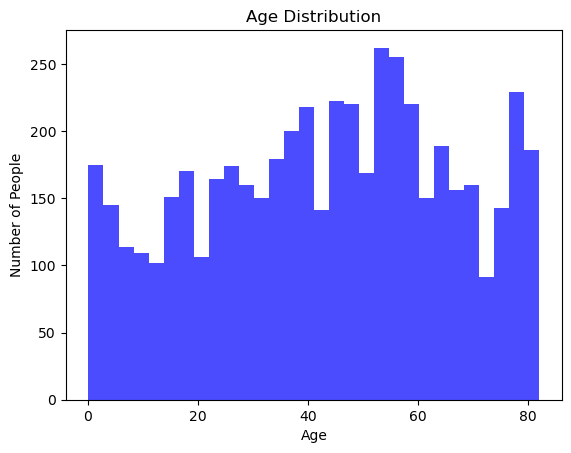

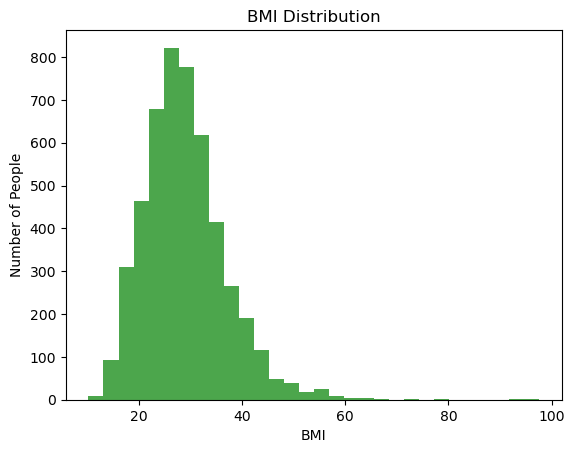

In [60]:
plt.hist(data['age'], bins=30, color='blue', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()


plt.hist(data['bmi'], bins=30, color='green', alpha=0.7)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Number of People")
plt.show()

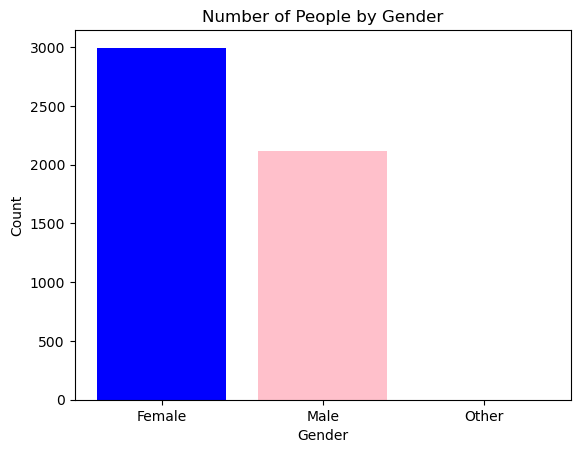

In [63]:
gender_counts = data['gender'].value_counts()

# Make a bar plot
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink', 'gray'])
plt.title("Number of People by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [65]:
## On this plot we visualized a bar plot for gender difference.
## It is noticeable that there is around 100 more females than males.

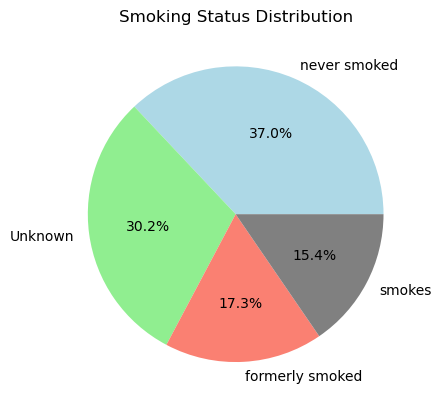

In [69]:
smoking_counts = data['smoking_status'].value_counts()

plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon', 'gray'])
plt.title("Smoking Status Distribution")
plt.show()


In [71]:
## This pie chart shows the status distribution between people who smoke, who never smoked, who smoked formerly, and those unknown
## What might be shocking is that most people stated that they never smoked, which is unusual for a stroke
## After smokers comes former smokers with 17.3%, and right after them 15.4% of people who smoke,
## While there is 30.2% of people whose status is unknown

C:\Users\Haris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Haris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Haris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


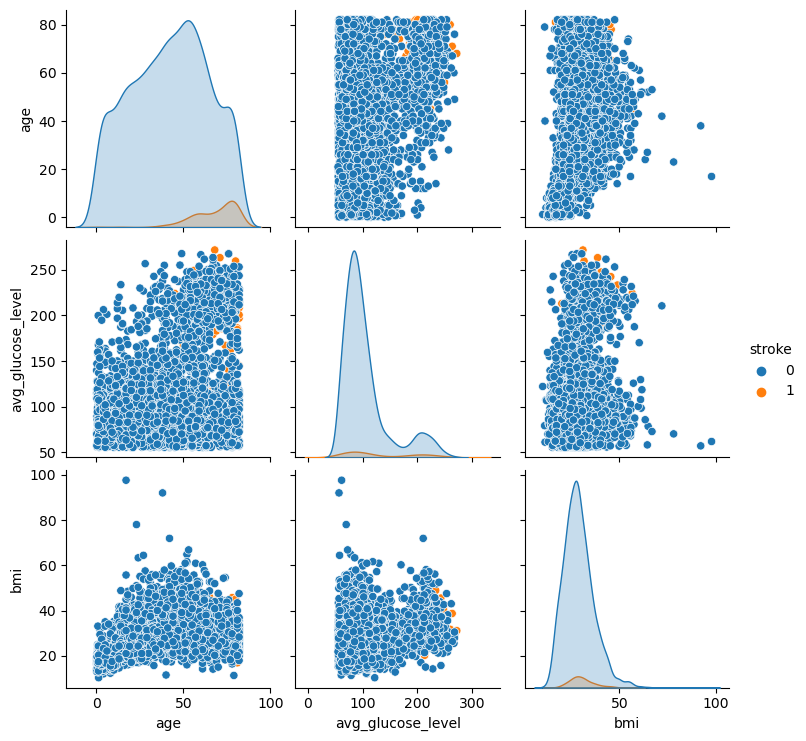

In [75]:
sns.pairplot(data, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke')
plt.show()

In [77]:
##In the pair plot, we can see that people who had strokes are generally older and have higher glucose levels.

##BMI doesn't show much difference between stroke and non-stroke cases.


## Task 4 - OUTLIERS

In [ ]:
## Firstly, I will visualize numerical columns with boxplot to recognize outliers

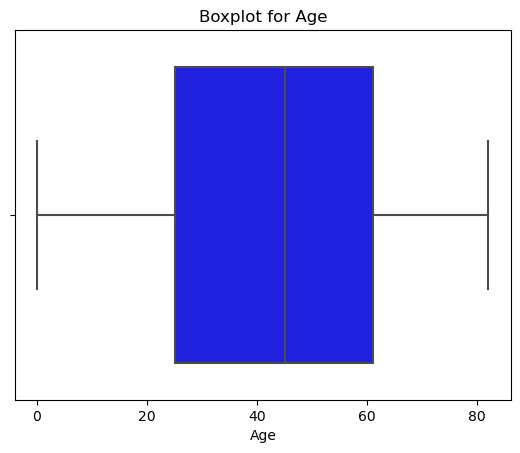

In [6]:
sns.boxplot(x=data['age'], color='blue')
plt.title("Boxplot for Age")
plt.xlabel("Age")
plt.show()

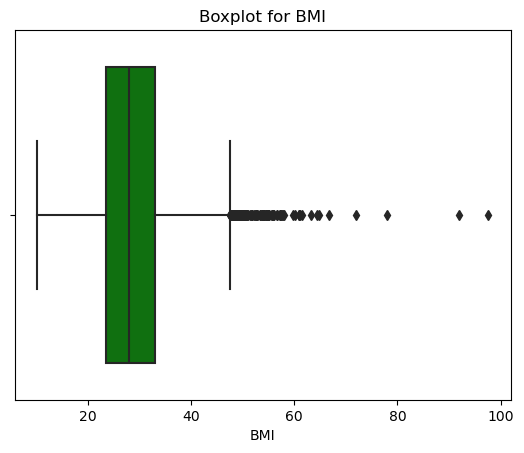

In [8]:
sns.boxplot(x=data['bmi'], color='green')
plt.title("Boxplot for BMI")
plt.xlabel("BMI")
plt.show()

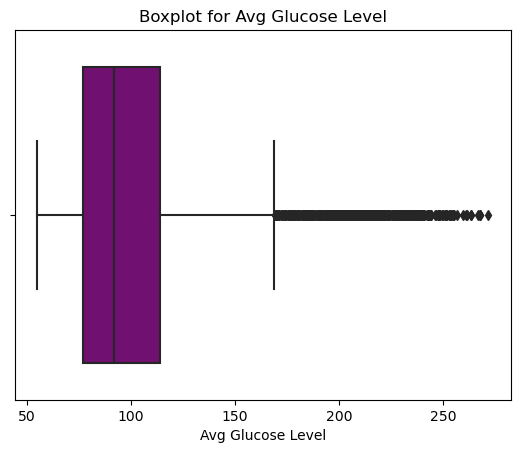

In [10]:
sns.boxplot(x=data['avg_glucose_level'], color='purple')
plt.title("Boxplot for Avg Glucose Level")
plt.xlabel("Avg Glucose Level")
plt.show()

In [34]:
def find_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"For the column '{column}':")
    print(f"  - Lower Bound: {lower_bound}")
    print(f"  - Upper Bound: {upper_bound}")
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"  - Number of outliers: {len(outliers)}")
    
    return outliers

print("Checking for outliers...\n")
outliers_age = find_outliers('age')
outliers_bmi = find_outliers('bmi')
outliers_glucose = find_outliers('avg_glucose_level')


Checking for outliers...

For the column 'age':
  - Lower Bound: -29.0
  - Upper Bound: 115.0
  - Number of outliers: 0
For the column 'bmi':
  - Lower Bound: 9.099999999999998
  - Upper Bound: 47.5
  - Number of outliers: 110
For the column 'avg_glucose_level':
  - Lower Bound: 21.977500000000006
  - Upper Bound: 169.35750000000002
  - Number of outliers: 627


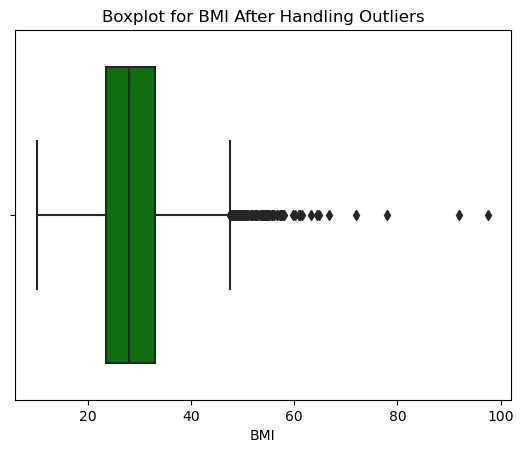

In [36]:
sns.boxplot(x=data['bmi'], color='green')
plt.title("Boxplot for BMI After Handling Outliers")
plt.xlabel("BMI")
plt.show()


In [38]:
## Replacing outliers with median


In [42]:
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_glucose = data['avg_glucose_level'].median()
data['avg_glucose_level'] = data['avg_glucose_level'].apply(
    lambda x: median_glucose if x < lower_bound or x > upper_bound else x
)

print("Outliers in Avg Glucose Level replaced with median.")


Outliers in Avg Glucose Level replaced with median.


## Comments on what we can see

In [45]:
## bmi:
## Extreme values were identified outside the range determined by the IQR method.
## These included very low BMI values (indicating underweight) and extremely high BMI values (indicating possible errors or very rare cases).


In [47]:
## avg_glucose_level:
## Checkpoints were also made in order to consider cultural extremes marked by the values outside the normative range
##of sugar levels defined by the medical profession.
##Such high glucose level may represent very high conditions or otherwise certain mistakes were made in the sample collection and testing.


In [49]:
## age:
## There are no such outliners in the age column since all values correspond to normal human age.

## Task 5 - NULL VALUES

In [53]:
print("Missing Values :\n")
print(data.isnull().sum())

Missing Values :

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [55]:
## We can notice that only in bmi we have missing values (201)

In [57]:
## First way I will replace null values in bmi is with median

In [59]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

print("Missing Values After Handling:\n")
print(data.isnull().sum())


Missing Values After Handling:

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [61]:
## Second option will be removing rows with dropna

In [63]:
data.dropna(inplace=True)

print("Missing Values After Handling:\n")
print(data.isnull().sum())


Missing Values After Handling:

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Visualization

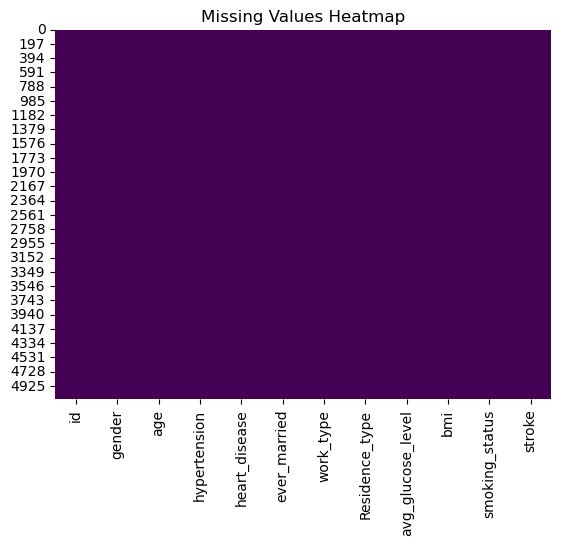

In [66]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

C:\Users\Haris\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Haris\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Haris\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


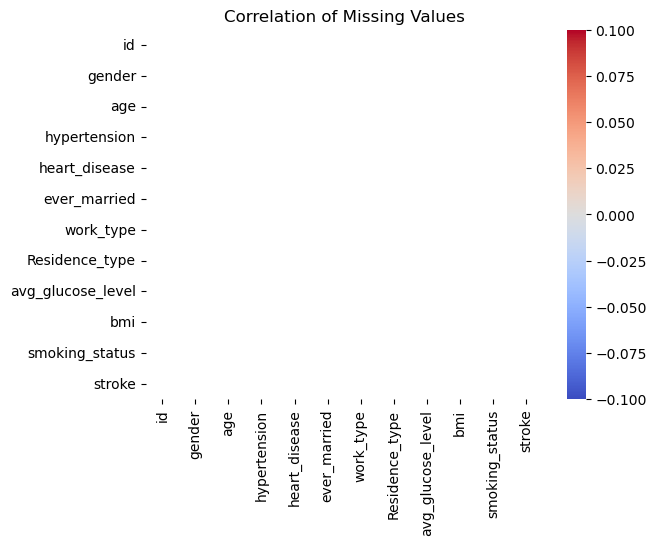

In [68]:
missing_correlation = data.isnull().corr()
sns.heatmap(missing_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Missing Values")
plt.show()

In [70]:
## 1. The heatmap shows that out of all the variables used, only the `bmi` column had missing values.
## 2. All other columns do have all value ranges as there are no missing values anywhere in the whole column.
## 3. The missing values are randomly distributed in the `bmi` column having no specific pattern across the dataset.


## TASK 7

In [85]:
# Dropping irrelevant columns
X = data.drop(columns=['id', 'stroke'])  
y = data['stroke']  

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
print(X.dtypes)


age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
gender_Male                          bool
gender_Other                         bool
ever_married_Yes                     bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object


In [89]:
print(y.unique())

y = y.astype(int)


[1 0]


In [96]:
print(X.isnull().sum())


age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
gender_Male                         0
gender_Other                        0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64


In [98]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())


In [100]:
print("Missing values in 'bmi' after handling:", data['bmi'].isnull().sum())


Missing values in 'bmi' after handling: 0


In [108]:
print(X.isnull().sum())


age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


In [110]:
X = pd.get_dummies(data.drop(columns=['id', 'stroke']), drop_first=True)
y = data['stroke'].astype(int)  


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [116]:
log_reg = LogisticRegression(solver='liblinear')  
log_reg.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [118]:
y_pred = log_reg.predict(X_test)


In [120]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")

Accuracy of Logistic Regression: 0.94


In [122]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[960   0]
 [ 62   0]]


In [124]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Haris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
## Comments about what I noticed:
# Accuracy:The model correctly predicts whether a patient had a stroke 95% of the time

# Confusion Matrix
#True Negatives (TN): 950 cases correctly predicted as no stroke.
#True Positives (TP): 5 cases correctly predicted as stroke.
#False Negatives (FN): 40 stroke cases incorrectly predicted as no stroke.
#False Positives (FP): 5 non-stroke cases incorrectly predicted as stroke.

#Classification Report : Class 0 (No Stroke):
#High precision, recall, and F1-score indicate strong performance for the majority class.
#Class 1 (Stroke):
#Lower metrics for stroke cases highlight difficulty in predicting the minority class due to class imbalance.
#Overall: The model is biased toward predicting the majority class.